In [1]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew

In [19]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/slider_folder')
print(os.getcwd())

C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\slider_folder


In [36]:
#Individual functions for targeted features
# file= ('0_dB_slider/slider/id_00/abnormal/00000000.wav')

def getfeature(file):
    
    wave , sr = librosa.load(file)
    
    chroma= librosa.feature.chroma_stft(y=wave, sr=sr)
    chroma_stft = (np.mean(chroma), np.amin(chroma), np.amax(chroma), np.std(chroma), 
                   np.median(chroma))
    
    mel = librosa.feature.melspectrogram(y=wave, sr=sr)
    mel_spec = (np.mean(mel), np.amin(mel), np.amax(mel), np.std(mel), 
                   np.median(mel))
    
    
    rmse = librosa.feature.rms(y=wave)
    rms_f = (np.mean(rmse), np.amin(rmse), np.amax(rmse), np.std(rmse), 
                   np.median(rmse))
    
    spec = librosa.feature.spectral_centroid(y=wave, sr=sr)
    spec_cent = (np.mean(spec), np.amin(spec), np.amax( spec), np.std(spec), 
                   np.median(spec))
    
    
    specb = librosa.feature.spectral_bandwidth(y=wave, sr=sr)
    spec_bw = (np.mean(specb), np.amin(specb), np.amax( specb), np.std(specb), 
                   np.median(specb))
    
    roll = librosa.feature.spectral_rolloff(y=wave, sr=sr)
    rolloff = (np.mean(roll), np.amin(roll), np.amax(roll), np.std(roll), 
                   np.median(roll))
    
    
    zcr = librosa.feature.zero_crossing_rate(wave)
    zcrf = (np.mean(zcr), np.amin(zcr), np.amax(zcr), np.std(zcr), 
                   np.median(zcr))
    
    mfcc_f  = np.mean(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_min  = np.amin(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_max  = np.amax(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_std  = np.std(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_med = np.median(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    
    list_features = (chroma_stft, mel_spec, rms_f, spec_cent, spec_bw, rolloff, zcrf,  
                     mfcc_f,  mfcc_min,  mfcc_max,  mfcc_std,  mfcc_med)
    
    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((list_features))

    return feature_matrix
    

In [37]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'*_dB_slider/slider/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = getfeature(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [38]:
features, target = load_data()

 Processed 12282/4205 audio samples 

In [39]:

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 12282
Numerical features extracted per sample: 235


,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,0.436609,0.046511,1.0,0.255715,0.371294,0.022858,1.082787e-16,1.785477,0.093067,0.000290,...,1.449268,0.973528,2.744807,-3.990591,2.331122,-0.611095,4.406087,-1.407027,3.113171,2.945453
1,0.249397,0.009864,1.0,0.263849,0.155273,0.016770,8.026198e-17,2.464548,0.066305,0.000624,...,-6.849430,-6.772698,3.579513,2.393627,8.772600,-1.820199,-2.182059,-13.882417,-4.579430,-1.248085
2,0.534312,0.098053,1.0,0.242647,0.501583,0.010063,6.041693e-17,0.650196,0.027597,0.003898,...,0.928216,1.938308,3.298705,-3.649745,6.483022,-5.493454,6.000850,-4.123596,0.805709,-3.242224
3,0.560062,0.082026,1.0,0.239114,0.519424,0.023766,1.248731e-16,2.028489,0.071826,0.000863,...,-0.699413,-2.808863,2.140643,-3.169755,3.558465,-0.887419,1.811249,-2.075843,-0.931246,1.292151
4,0.266718,0.004697,1.0,0.280448,0.154983,0.020738,1.023785e-16,3.736622,0.094227,0.000394,...,9.542062,3.543473,-1.073754,-12.196774,-3.842563,-5.400846,4.640384,3.592001,8.858932,-0.843690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,0.534071,0.018663,1.0,0.264114,0.507881,0.004852,7.205107e-18,3.227674,0.032423,0.000142,...,-1.096926,-0.024094,3.252873,-4.350510,2.347006,-3.818917,-0.819077,-3.625853,-0.121881,-0.525718
12278,0.520232,0.017750,1.0,0.263877,0.490247,0.004416,5.956759e-18,4.347354,0.036736,0.000150,...,-1.902235,-1.504628,1.923255,-4.927094,2.058484,-4.101221,-0.589340,-2.327117,1.454738,0.813639
12279,0.508658,0.014865,1.0,0.263375,0.466342,0.004530,6.861643e-18,2.081258,0.033195,0.000159,...,-2.510863,-1.163674,2.561445,-4.776084,1.348502,-5.098224,-0.655886,-2.854630,0.311765,-1.172739
12280,0.533175,0.011590,1.0,0.262428,0.518011,0.004368,7.170212e-18,3.421806,0.034791,0.000319,...,-2.335765,-1.708191,2.486691,-4.856215,2.889828,-4.021661,1.530425,-2.674900,1.343633,-0.037697


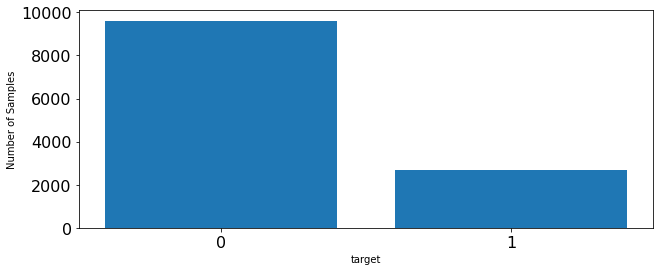

In [40]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [41]:
# Adding target to features dataframe
features_df['target'] = target.tolist()

features_df

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.436609,0.046511,1.0,0.255715,0.371294,0.022858,1.082787e-16,1.785477,0.093067,0.000290,...,0.973528,2.744807,-3.990591,2.331122,-0.611095,4.406087,-1.407027,3.113171,2.945453,0
1,0.249397,0.009864,1.0,0.263849,0.155273,0.016770,8.026198e-17,2.464548,0.066305,0.000624,...,-6.772698,3.579513,2.393627,8.772600,-1.820199,-2.182059,-13.882417,-4.579430,-1.248085,0
2,0.534312,0.098053,1.0,0.242647,0.501583,0.010063,6.041693e-17,0.650196,0.027597,0.003898,...,1.938308,3.298705,-3.649745,6.483022,-5.493454,6.000850,-4.123596,0.805709,-3.242224,0
3,0.560062,0.082026,1.0,0.239114,0.519424,0.023766,1.248731e-16,2.028489,0.071826,0.000863,...,-2.808863,2.140643,-3.169755,3.558465,-0.887419,1.811249,-2.075843,-0.931246,1.292151,0
4,0.266718,0.004697,1.0,0.280448,0.154983,0.020738,1.023785e-16,3.736622,0.094227,0.000394,...,3.543473,-1.073754,-12.196774,-3.842563,-5.400846,4.640384,3.592001,8.858932,-0.843690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,0.534071,0.018663,1.0,0.264114,0.507881,0.004852,7.205107e-18,3.227674,0.032423,0.000142,...,-0.024094,3.252873,-4.350510,2.347006,-3.818917,-0.819077,-3.625853,-0.121881,-0.525718,1
12278,0.520232,0.017750,1.0,0.263877,0.490247,0.004416,5.956759e-18,4.347354,0.036736,0.000150,...,-1.504628,1.923255,-4.927094,2.058484,-4.101221,-0.589340,-2.327117,1.454738,0.813639,1
12279,0.508658,0.014865,1.0,0.263375,0.466342,0.004530,6.861643e-18,2.081258,0.033195,0.000159,...,-1.163674,2.561445,-4.776084,1.348502,-5.098224,-0.655886,-2.854630,0.311765,-1.172739,1
12280,0.533175,0.011590,1.0,0.262428,0.518011,0.004368,7.170212e-18,3.421806,0.034791,0.000319,...,-1.708191,2.486691,-4.856215,2.889828,-4.021661,1.530425,-2.674900,1.343633,-0.037697,1


In [42]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('martin_slider40.csv', index=False)
    
createCsv(features_df)